celerity= 1.847477454235281
wavenumber= 1.700476856368556
paddle average u by WaveTool = 0.0455408663587999 0.045523193479792175


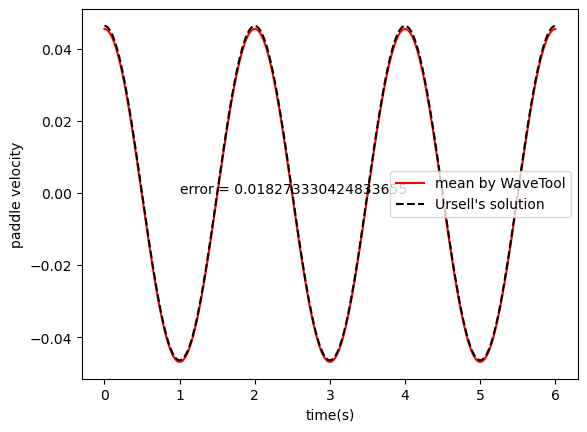

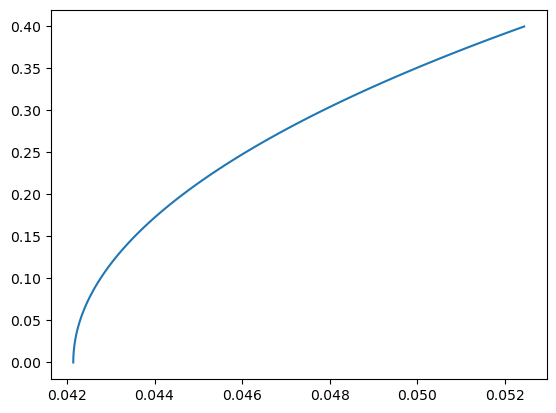

In [2]:
# This code compares the wavemaker's velocities obtained by average of WaveTools and Ursell's solution
# For regular wave
import matplotlib.pyplot as plt
import numpy as np
import math
from proteus import WaveTools as wt
from scipy import integrate

# gravitational acceleration
g = np.array([0., -9.81, 0.])

# wave options
# For h=0.4, T=2(omega=pi), and H=0.02
# The displacement of the piston-type wavemaker is expected to be 0.0.014765931*sin(pi*t)
# Therefore, the velocity of the paddle is 0.0.014765931*pi*cos(pi*t)
h = 0.4
L = 30
wave_period = 2.
wave_height = 0.02
wave_direction = np.array([1., 0., 0.])
wave_type = 'Linear' #'Fenton'  #
fast = 'True'
wave = wt.MonochromaticWaves(period=wave_period,
                             waveHeight=wave_height,
                             mwl=h,
                             depth=h,
                             g=g,
                             waveDir=wave_direction,
                             waveType=wave_type,
                             fast=False)
wavelength = wave.wavelength

        
time = np.linspace(0,6.,601) #np.array([0.]) # time instant
nx = 200 # node number on free surface
ny = 101 # node number along wave paddle
x = np.linspace(0,L,nx)
y = np.linspace(0,h,ny)

def average(x,y):
    num = integrate.simpson(y, x)
    return num/(x[-1]-x[0])


def Ursell_sol(k,h,wave_height,wave_period):
    h_s = 2.*(np.cosh(2.*k*h)-1.)/(np.sinh(2*k*h)+2.*k*h)
    return 0.5*wave_height/h_s*(2.*math.pi/wave_period)  

u_urs = Ursell_sol(2.*math.pi/wavelength,h,wave_height,wave_period)

u_avg = []
u_mean = []
for t in time:
    # on the wave paddle
    u_paddle = []
    v_paddle = []
    for i in range(ny):
        u_paddle.append(wave.u([0.,y[i],0.],t)[0])
        v_paddle.append(wave.u([0.,y[i],0.],t)[1])

    u_avg.append(average(y,u_paddle))
    u_mean.append(np.mean(u_paddle))
    
# on the free surface
# ele_fs = []
# u_fs = []
# v_fs = []
# for i in range(nx):
#     ele_fs.append(wave.eta([x[i],h,0.],time))
#     u_fs.append(wave.u([x[i],h,0.],time)[0])
#     v_fs.append(wave.u([x[i],h,0.],time)[1])    


err = abs(u_avg[0]-u_urs)/u_urs
err = abs(u_mean[0]-u_urs)/u_urs
plt.plot(time,u_mean,'-r',time,u_urs*np.cos(math.pi*time),'--k')
plt.xlabel("time(s)")
plt.ylabel("paddle velocity")
plt.legend(['mean by WaveTool',"Ursell's solution"])
plt.text(1.,0.,'error = '+str(err))


print('celerity=',wavelength/wave_period)
print('wavenumber=',2.*math.pi/wavelength)
print('paddle average u by WaveTool =',np.mean(u_paddle),average(y,u_paddle))
# print('paddle tip u by WaveTool =',u_paddle[-1])
# print('paddle u by Ursell=',u_urs)

# plt.figure(1)
# plt.plot(x,ele_fs)
plt.figure(2)
plt.plot(u_paddle,y)


200


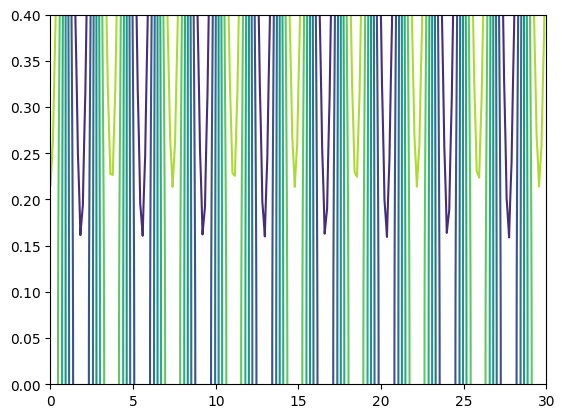

In [38]:
mx, my = np.meshgrid(x, y)

def vel(x, y):
    return wave.u([x,y,0.],time)
def vel_u(x, y):
    return wave.u([x,y,0.],time)[0]
def vel_v(x, y):
    return wave.u([x,y,0.],time)[1]

# u = vel(mx,my)

t = 0.

u = np.zeros((np.size(mx,0),np.size(mx,1)))
v = np.zeros((np.size(mx,0),np.size(mx,1)))
print(np.size(mx,1))
for i in range(np.size(mx,0)):
    for j in range(np.size(mx,1)):
        u[i][j] = wave.u([mx[i][j],my[i][j],0.],t)[0]
        v[i][j] = wave.u([mx[i][j],my[i][j],0.],t)[1]

plt.contour(mx,my,u);
# plt.axis('equal')